In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

In [69]:
dataset = pd.read_csv('data_set\Social_Network_Ads.csv')

In [70]:
len(dataset)


400

In [71]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,NaN,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,NaN,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [72]:
dataset.shape

(400, 5)

In [73]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [74]:
dataset.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

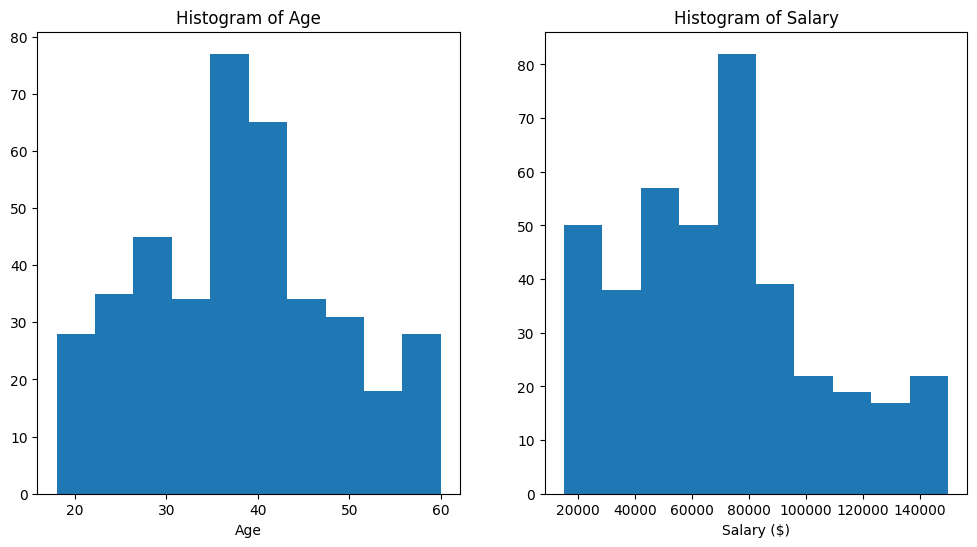

In [75]:
fig = plt.figure(figsize=(12, 6))
age = fig.add_subplot(121)
salary = fig.add_subplot(122)

age.hist(dataset['Age'], bins=10)
age.set_xlabel('Age')
age.set_title("Histogram of Age")

salary.hist(dataset['EstimatedSalary'], bins=10)
salary.set_xlabel('Salary ($)')
salary.set_title("Histogram of Salary")

plt.show()

Text(0, 0.5, 'Salary')

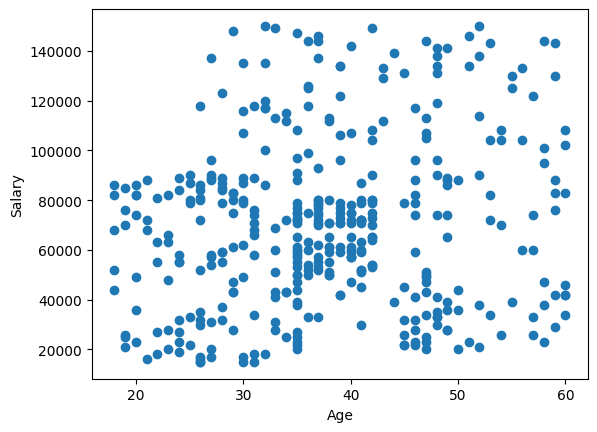

In [76]:
fig = plt.scatter(dataset['Age'], dataset['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('Salary')

# Standard Scaler 

In [77]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                5
EstimatedSalary    4
Purchased          0
dtype: int64

In [78]:
X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:,-1].values
print(X)

[['Male' 19.0 nan]
 ['Male' 35.0 20000.0]
 ['Female' nan 43000.0]
 ...
 ['Female' 50.0 20000.0]
 ['Male' 36.0 33000.0]
 ['Female' 49.0 36000.0]]


In [79]:
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
print(X[:,0])

[1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0]


In [80]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:4])
X[:, 1:4] = imputer.fit_transform(X[:, 1:4])

print(X[:,1:4])

[[19.0 70002.52525252526]
 [35.0 20000.0]
 [37.731645569620255 43000.0]
 [27.0 57000.0]
 [19.0 76000.0]
 [37.731645569620255 58000.0]
 [27.0 70002.52525252526]
 [32.0 150000.0]
 [25.0 33000.0]
 [35.0 65000.0]
 [37.731645569620255 80000.0]
 [26.0 52000.0]
 [20.0 86000.0]
 [37.731645569620255 18000.0]
 [18.0 82000.0]
 [29.0 80000.0]
 [47.0 25000.0]
 [45.0 26000.0]
 [46.0 28000.0]
 [48.0 70002.52525252526]
 [45.0 22000.0]
 [47.0 49000.0]
 [48.0 41000.0]
 [45.0 22000.0]
 [46.0 23000.0]
 [47.0 20000.0]
 [49.0 28000.0]
 [37.731645569620255 30000.0]
 [29.0 43000.0]
 [31.0 18000.0]
 [31.0 74000.0]
 [27.0 137000.0]
 [21.0 16000.0]
 [28.0 70002.52525252526]
 [27.0 90000.0]
 [35.0 27000.0]
 [33.0 28000.0]
 [30.0 49000.0]
 [26.0 72000.0]
 [27.0 31000.0]
 [27.0 17000.0]
 [33.0 51000.0]
 [35.0 108000.0]
 [30.0 15000.0]
 [28.0 84000.0]
 [23.0 20000.0]
 [25.0 79000.0]
 [27.0 54000.0]
 [30.0 135000.0]
 [31.0 89000.0]
 [24.0 32000.0]
 [18.0 44000.0]
 [29.0 83000.0]
 [35.0 23000.0]
 [27.0 58000.0]
 [24.0

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

print(X_train,X_test,y_test,y_train)

[[1 24.0 84000.0]
 [1 25.0 79000.0]
 [0 24.0 32000.0]
 [0 42.0 53000.0]
 [1 37.0 72000.0]
 [1 34.0 43000.0]
 [0 21.0 68000.0]
 [0 19.0 26000.0]
 [0 20.0 36000.0]
 [0 37.731645569620255 30000.0]
 [1 38.0 59000.0]
 [1 39.0 77000.0]
 [0 50.0 36000.0]
 [0 36.0 54000.0]
 [1 47.0 105000.0]
 [1 42.0 64000.0]
 [1 39.0 96000.0]
 [0 39.0 71000.0]
 [1 22.0 81000.0]
 [0 27.0 70002.52525252526]
 [1 35.0 38000.0]
 [0 42.0 80000.0]
 [1 35.0 58000.0]
 [1 35.0 72000.0]
 [0 49.0 39000.0]
 [0 27.0 57000.0]
 [1 45.0 22000.0]
 [0 48.0 70002.52525252526]
 [1 49.0 86000.0]
 [1 29.0 80000.0]
 [0 53.0 104000.0]
 [1 27.0 20000.0]
 [1 31.0 76000.0]
 [0 30.0 62000.0]
 [0 44.0 139000.0]
 [1 30.0 80000.0]
 [1 29.0 75000.0]
 [0 58.0 38000.0]
 [0 27.0 137000.0]
 [0 58.0 101000.0]
 [0 38.0 112000.0]
 [1 23.0 20000.0]
 [1 34.0 115000.0]
 [0 27.0 54000.0]
 [0 42.0 108000.0]
 [1 32.0 100000.0]
 [0 49.0 36000.0]
 [0 36.0 75000.0]
 [0 32.0 117000.0]
 [1 26.0 81000.0]
 [0 35.0 97000.0]
 [0 57.0 122000.0]
 [0 37.0 57000.0]
 

In [82]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [83]:
classifier = KNeighborsClassifier(n_neighbors= 5 , metric='minkowski', p =5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [84]:
new_data = pd.DataFrame({
    'Gender' : 0,
    'Age': [30],
    'EstimatedSalary': [500000]
})

# Standardize new data
new_data_scaled = sc.transform(new_data)

# Predict the output for new values
new_prediction = classifier.predict(new_data_scaled)
print("Predicted Purchase (1: yes,Purchased, 0: No,not Purchased yet):", new_prediction[0])

Predicted Purchase (1: yes,Purchased, 0: No,not Purchased yet): 1


c:\Users\abdel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Confusing Matrix is [[46  3]
 [ 5 26]] 



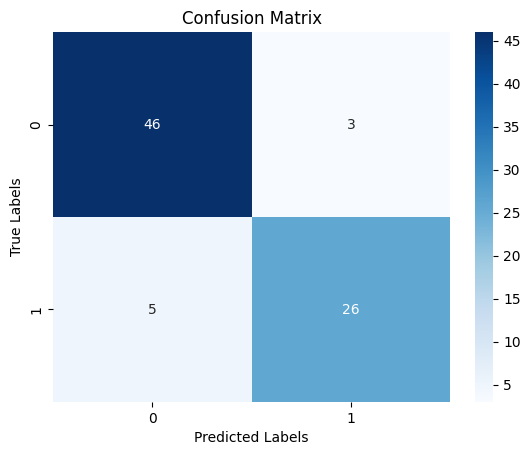

Accuracy is 90%


In [91]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusing Matrix is {cm} \n")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# print Accuracy = 90%
accuracy = int(round(accuracy * 100))
print(f"Accuracy is {accuracy}%")